In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv(r"C:\Users\adars\Downloads\titanic_dataset.csv", index_col= 'PassengerId')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Filling missing values

In [6]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# since age is a continous feature checking its distribution

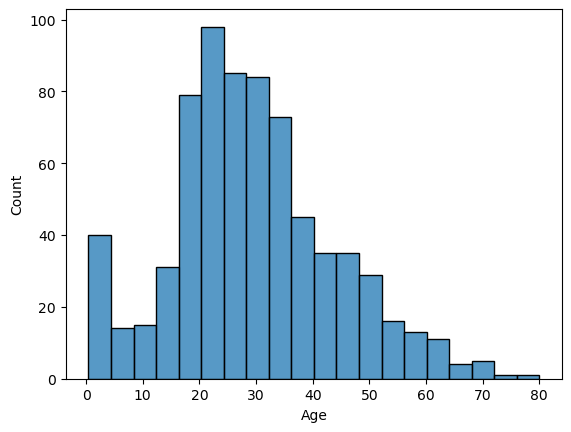

In [8]:
sns.histplot(data= titanic, x= 'Age')
plt.show()

In [9]:
# the distribution is left skewed hence we can fill the null value using median

In [10]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [11]:
# Embarked is categorical feature so we could use mode fill the null values

In [12]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode().iloc[0])

In [13]:
# the number of null values in the Cabin column is 687 which is approx 77% the total value and since it does not directly 
# influence our analysis we are deciding to drop the column

In [14]:
titanic.drop('Cabin', axis = 1, inplace = True)

In [15]:
titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Dealing with outliers

In [16]:
# ploting a box plot to identify the otliers in all the numerical columns

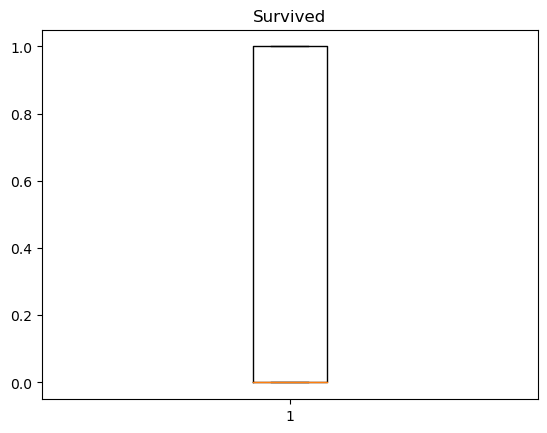

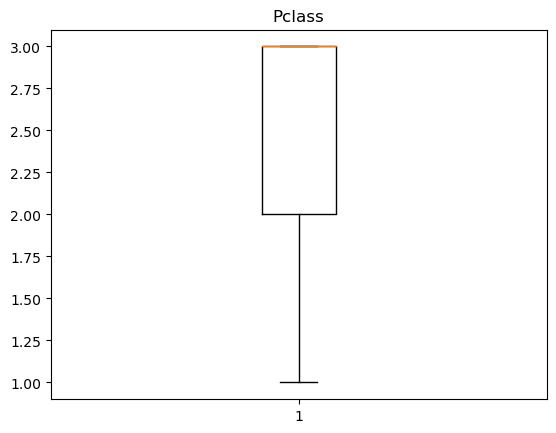

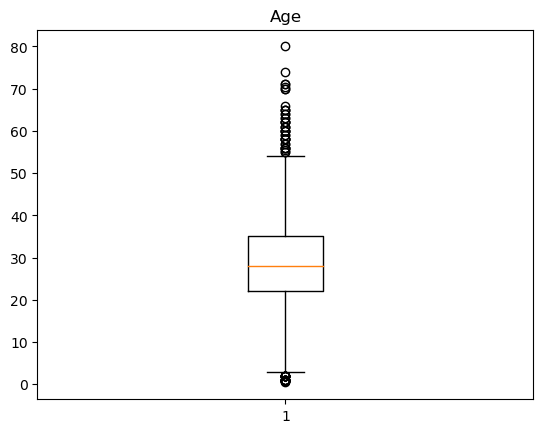

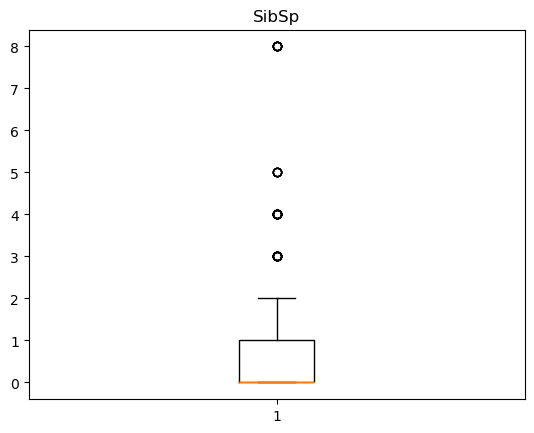

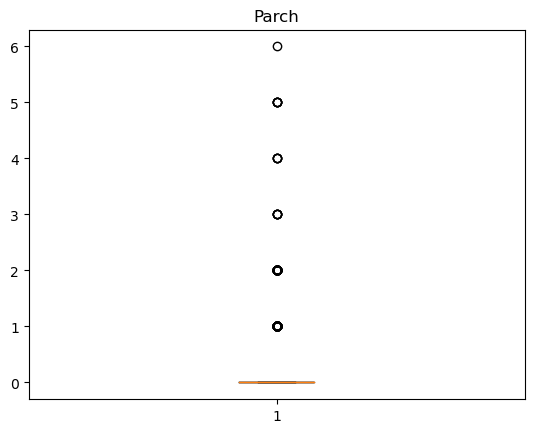

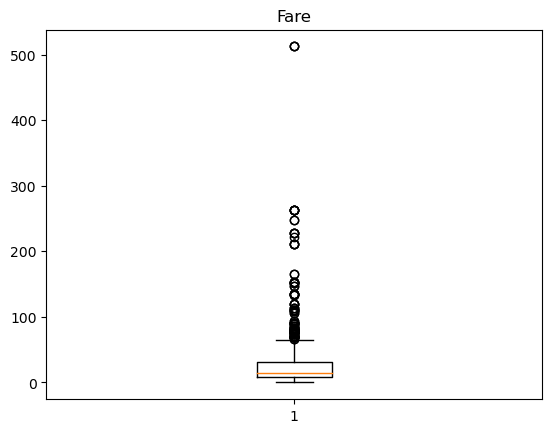

In [17]:
for column in ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare']:
    plt.figure()
    plt.boxplot(titanic[column])
    plt.title(column)

In [18]:
# from this plot it is clear that outliers that actually matters are in the columns Fare and age but since these outliers
# are essential for our analysis hence they cannot be dropped. here lets use a function to identify all the outliers
# using the IQR range

In [19]:
def Outlier_detection(df,threshold = 1.5):
    data = titanic.copy()
    for column in data.select_dtypes(include = [np.number]):
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        up_lim = q3 + threshold * iqr
        low_lim = q1 - threshold * iqr
        
        outliers = data[(data[column] > up_lim) | (data[column] < low_lim)]
        outlier = outliers.index
        
    return outliers
        

In [20]:
outliers = Outlier_detection(titanic)

In [25]:
outliers # these are the outliers in the dataset according to the IQR values

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...
847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S


In [26]:
# we cannot perform log transform on the fare column beacuse there are certain columns that has 0 value

In [21]:
titanic[titanic['Fare'] < 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,S
467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S


In [22]:
# this can be avoided by adding a 1e-10 to the column and after performing log transformation and scaling minus this value
# to obtain the original value

In [23]:
titanic['Fare'] = titanic['Fare'] + 1e-10

In [24]:
titanic['Fare'] = np.log(titanic['Fare'])

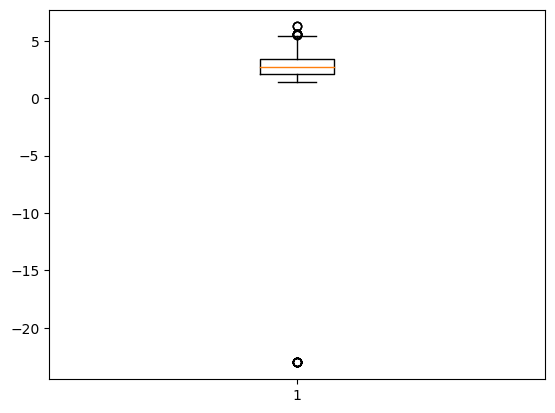

In [27]:
plt.boxplot(titanic['Fare']) # we have been able to reduce the no of outliers
plt.show()

### Applying Min Max Scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
x = titanic.drop(['Survived', 'Name', 'Sex', 'Embarked', 'Ticket'], axis = 1)

In [30]:
y = titanic[['Survived', 'Name', 'Sex', 'Embarked', 'Ticket']]

In [31]:
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(x)


In [32]:
y_reset = y.reset_index(drop = True) # this is done to avoid any mismatching while concatinating the scaled feattures
                                    # to the remaing dataset

In [33]:
x_scaled = pd.DataFrame(x, columns= ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [34]:
x_reset = x_scaled.reset_index(drop = True)

In [35]:
titanic_scaled = y_reset.join(x_reset)

In [37]:
titanic_scaled['Fare'] = titanic_scaled['Fare'] - 1e-10 # to retain our original fare values

In [38]:
titanic_scaled

,Survived,Name,Sex,Embarked,Ticket,Pclass,Age,SibSp,Parch,Fare
0,0,"Braund, Mr. Owen Harris",male,S,A/5 21171,3,22.0,1,0,1.981001
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C,PC 17599,1,38.0,1,0,4.266662
2,1,"Heikkinen, Miss. Laina",female,S,STON/O2. 3101282,3,26.0,0,0,2.070022
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S,113803,1,35.0,1,0,3.972177
4,0,"Allen, Mr. William Henry",male,S,373450,3,35.0,0,0,2.085672
...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",male,S,211536,2,27.0,0,0,2.564949
887,1,"Graham, Miss. Margaret Edith",female,S,112053,1,19.0,0,0,3.401197
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,S,W./C. 6607,3,28.0,1,2,3.154870
889,1,"Behr, Mr. Karl Howell",male,C,111369,1,26.0,0,0,3.401197
